## 1 - Introduce the Data
Task: Given attributes about a women, predict whether she suffers from Urinary incontinence or not

In [370]:
# Import data and take a look
import numpy as np
import pandas as pd
df = pd.read_csv('data_set.csv', encoding='latin-1')

In [371]:
df.head(5)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_,FuitesUrinaires
0,22,Célibataire,Universitaire,25.631168,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1.0,0,Non fumeur,1
1,59,Veuve,Universitaire,33.203125,1.0,NaN,1.0,NaN,NaN,NaN,...,0,0,0,0,0,0,1.0,1,Non fumeur,1
2,36,Mariée,Primaire,29.387755,3.0,3.0,NaN,NaN,2.0,NaN,...,0,0,0,0,0,0,0.0,0,Non fumeur,1
3,25,Célibataire,Universitaire,19.100092,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0,Non fumeur,0
4,45,Mariée,Secondaire,33.203125,2.0,NaN,2.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0.0,0,Non fumeur,0


In [372]:
# Take a look at the outcome variable: 'FuitesUrinaires'
print(df['FuitesUrinaires'].value_counts())

0    127
1     62
Name: FuitesUrinaires, dtype: int64


In [373]:
# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df.drop('FuitesUrinaires', 1)
y = df.FuitesUrinaires

C:\Users\lenovo\AppData\Local\Temp/ipykernel_2760/2549373626.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('FuitesUrinaires', 1)


In [374]:
X.head(5)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
0,22,Célibataire,Universitaire,25.631168,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0,0,0,0,0,0,1.0,0,Non fumeur
1,59,Veuve,Universitaire,33.203125,1.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,Non fumeur
2,36,Mariée,Primaire,29.387755,3.0,3.0,NaN,NaN,2.0,NaN,...,0.0,0,0,0,0,0,0,0.0,0,Non fumeur
3,25,Célibataire,Universitaire,19.100092,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0.0,0,Non fumeur
4,45,Mariée,Secondaire,33.203125,2.0,NaN,2.0,NaN,NaN,1.0,...,1.0,0,0,0,0,0,0,0.0,0,Non fumeur


## 2 - Data Pre-Processing
### a - Encoding categorical features (Situationfamiliale, NiveauEtude, StatutTabagiqueActif_)
- We will use OrdinalEncoder() to encode categorical features
- We can't use LabelEncoder() because it encodes missing values (nan)
- LabelEncoder is used to encode target values, i.e. y, and not the input X. (from docs https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
- We can also use get_dummies in pandas and OneHotEncoder in sci-kit learn

In [375]:
# Situationfamiliale is a categorical feature:
print(X['Situationfamiliale'].head(5))

0    Célibataire 
1           Veuve
2          Mariée
3    Célibataire 
4          Mariée
Name: Situationfamiliale, dtype: object


In [376]:
# Decide which categorical variables you want to use in model
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

['Célibataire ' 'Veuve' 'Mariée' 'Divorcée ']
Feature 'Situationfamiliale' has 4 unique categories
['Universitaire ' 'Primaire' 'Secondaire' 'Analphabète']
Feature 'NiveauEtude' has 4 unique categories
['Non fumeur ' nan 'fumeur regulier ' 'Ex fumeur ' 'fumeur occasionnel ']
Feature 'StatutTabagiqueActif_' has 5 unique categories


In [377]:
# Create a list of features to encode
to_encode_list = ['Situationfamiliale', 'NiveauEtude', 'StatutTabagiqueActif_']

In [378]:
# Using OrdinalEncoder() to encode all the categorical variables used for modeling
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
for item in to_encode_list:
    # we need to reshape the column to 2D array instead of 1D array (required in OrdinalEncoder)
    col_reshaped = X[item].values.reshape(-1, 1)
    X[item] = encoder.fit_transform(col_reshaped)

In [379]:
X.head(10)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
0,22,0.0,3.0,25.631168,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0,0,0,0,0,0,1.0,0,1.0
1,59,3.0,3.0,33.203125,1.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,1.0
2,36,2.0,1.0,29.387755,3.0,3.0,NaN,NaN,2.0,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1.0
3,25,0.0,3.0,19.100092,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0.0,0,1.0
4,45,2.0,2.0,33.203125,2.0,NaN,2.0,NaN,NaN,1.0,...,1.0,0,0,0,0,0,0,0.0,0,1.0
5,22,0.0,3.0,28.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,1.0,0,1.0
6,60,2.0,1.0,28.906250,7.0,7.0,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,NaN
7,42,2.0,1.0,35.261708,2.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0,0,0,0,0,0,0.0,0,NaN
8,21,0.0,3.0,19.289379,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1.0
9,36,0.0,3.0,24.767566,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,0,1,0,0,0,0,1.0,0,1.0


In [380]:
# check for encoding
encoder.inverse_transform(np.array([[0],[1],[2],[3],[1],[1]]))

array([['Ex fumeur '],
       ['Non fumeur '],
       ['fumeur occasionnel '],
       ['fumeur regulier '],
       ['Non fumeur '],
       ['Non fumeur ']], dtype=object)

### b - Transform some data as mentioned in data dictionary
- some features need to be transformed 
- for example 'Nombredeparite', it must take the values 0, 1, 2
- so if it is greater than 2, it will be set to 2

In [381]:
# Create a list of columns names to be transformed
columns_to_be_transformed = ['Nombredeparite', 'NombreAVBoisse', 'NombreAccouchCésarienne', 'NombreAccouchInstrumental', 'NombreEpisiotomie', 'NombreBebeMacrosomes']

In [382]:
# Function to set a column cell to 2 if it's greater than 2
def transform_df(column):
    for i in range(len(column)):
        if not(pd.isnull(column[i])) and column[i] > 2:
            column[i] = 2

In [383]:
# transform all data (set 2 if it's greater than 2)
for column_name in columns_to_be_transformed:
    transform_df(X[column_name])

C:\Users\lenovo\AppData\Local\Temp/ipykernel_2760/187037212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i] = 2


In [384]:
X.head(10)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
0,22,0.0,3.0,25.631168,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0,0,0,0,0,0,1.0,0,1.0
1,59,3.0,3.0,33.203125,1.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,1.0
2,36,2.0,1.0,29.387755,2.0,2.0,NaN,NaN,2.0,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1.0
3,25,0.0,3.0,19.100092,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0.0,0,1.0
4,45,2.0,2.0,33.203125,2.0,NaN,2.0,NaN,NaN,1.0,...,1.0,0,0,0,0,0,0,0.0,0,1.0
5,22,0.0,3.0,28.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,1.0,0,1.0
6,60,2.0,1.0,28.906250,2.0,2.0,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,NaN
7,42,2.0,1.0,35.261708,2.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0,0,0,0,0,0,0.0,0,NaN
8,21,0.0,3.0,19.289379,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1.0
9,36,0.0,3.0,24.767566,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,0,1,0,0,0,0,1.0,0,1.0


### c - Normalization
- Some data need to be normalized
- Set data in the range [0, 1]
- Features to be normalized are 'Age' and 'IMC'
- We will use MinMaxScaler() to normalize data
- We can also use StandardScaler()

In [385]:
# Create a list of columns names to be normalized
columns_to_be_normalized = ['Age', 'IMC']

In [386]:
# Normalization using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for item in columns_to_be_normalized:
     # we need to reshape the column to 2D array instead of 1D array (required in MinMaxScaler)
    col_reshaped = X[item].values.reshape(-1, 1)
    X[item] = scaler.fit_transform(col_reshaped) 

In [387]:
X.head(10)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
0,0.072727,0.0,3.0,0.315921,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0,0,0,0,0,0,1.0,0,1.0
1,0.745455,3.0,3.0,0.601801,1.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,1.0
2,0.327273,2.0,1.0,0.457751,2.0,2.0,NaN,NaN,2.0,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1.0
3,0.127273,0.0,3.0,0.069339,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0.0,0,1.0
4,0.490909,2.0,2.0,0.601801,2.0,NaN,2.0,NaN,NaN,1.0,...,1.0,0,0,0,0,0,0,0.0,0,1.0
5,0.072727,0.0,3.0,0.405356,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,1.0,0,1.0
6,0.763636,2.0,1.0,0.439572,2.0,2.0,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,NaN
7,0.436364,2.0,1.0,0.679523,2.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0,0,0,0,0,0,0.0,0,NaN
8,0.054545,0.0,3.0,0.076486,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1.0
9,0.327273,0.0,3.0,0.283315,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,0,1,0,0,0,0,1.0,0,1.0


### d - Handling missing data
- We need to replace missing values with other values
- This is called imputation
- So we will use SimpleImputer() to handle that

In [388]:
# How much of your data is missing?
X.isnull().sum().sort_values(ascending=False).head()

NombreAccouchInstrumental    64
NombreEpisiotomie            57
NombreAccouchCésarienne      51
NombreBebeMacrosomes         51
NombreAVBoisse               39
dtype: int64

In [389]:
# Impute missing values using Imputer in sklearn.preprocessing
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X) , columns=X.columns)

In [390]:
# Now check again to see if you still have missing data
X.isnull().sum().sort_values(ascending=False).head()

Age                              0
ChirurgieVaginale                0
TabagismePassif                  0
Incontinenceurinairefamiliale    0
EnuresieInfantile                0
dtype: int64

In [391]:
#export data after imputing
X.to_csv('data_imputed.csv',encoding = "latin-1", index=False)

# 3- Building models
## a- Logistic Regression

In [392]:
# Use train_test_split in sklearn.cross_validation to split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)

In [393]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

### - Evaluating the model performance
- Display the Confusion matrix

In [394]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def confusion_matrix(y_pred):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

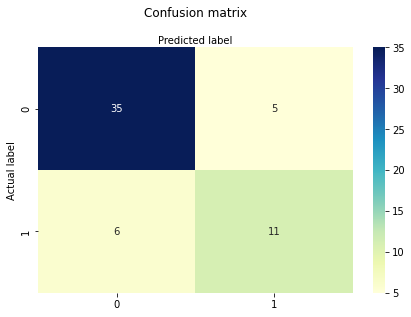

In [395]:
confusion_matrix(y_pred)

### Formulas to evaluate the model performance
- Precision = TP/(TP + FP)
- Recall = TP/(TP+FN)
- Accuracy = T/(T+F)
- F1 = 2*(Recall * Precision)/(Recall + Presision)


In [396]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-Measure:",metrics.f1_score(y_test, y_pred))
print("Roc-AUC:",metrics.roc_auc_score(y_test, y_pred))

Precision: 0.6875
Recall: 0.6470588235294118
Accuracy: 0.8070175438596491
F1-Measure: 0.6666666666666667
Roc-AUC: 0.7610294117647058


In [397]:
# Function to build model and find model performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc

In [398]:
# Find performance of model using preprocessed data
auc_processed = find_model_perf(X_train, y_train, X_test, y_test)
print(auc_processed)

0.8661764705882353


## b- Support Vector Machine

In [399]:
from sklearn import svm

clf#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

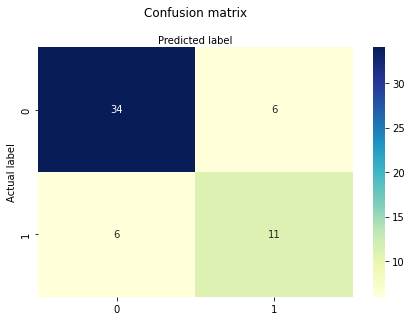

In [400]:
confusion_matrix(y_pred)

In [401]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-Measure:",metrics.f1_score(y_test, y_pred))
print("Roc-AUC:",metrics.roc_auc_score(y_test, y_pred))

Precision: 0.6470588235294118
Recall: 0.6470588235294118
Accuracy: 0.7894736842105263
F1-Measure: 0.6470588235294118
Roc-AUC: 0.7485294117647059


## c- KNN

In [420]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

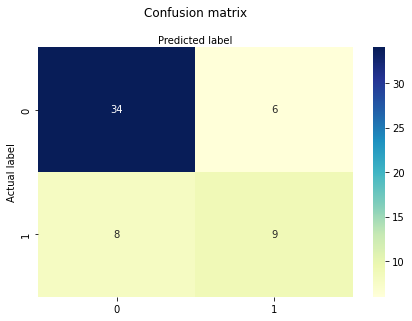

In [421]:
confusion_matrix(y_pred)

In [422]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-Measure:",metrics.f1_score(y_test, y_pred))
print("Roc-AUC:",metrics.roc_auc_score(y_test, y_pred))

Precision: 0.6
Recall: 0.5294117647058824
Accuracy: 0.7543859649122807
F1-Measure: 0.5625
Roc-AUC: 0.6897058823529411
